# Exploratory Data Analysis



Important note: Most of the structure and some parts of the text are based on the book **["Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python"](https://amzn.to/3LvOdG6)**. Most of the code and all the datasets are different from the book for better exemplification.
You can buy the book to get the original examples and full information **[here](https://amzn.to/3LvOdG6)** or clicking the name of the book above.


## Statistics 

Is a branch of applied mathematics that involves the collection, description, analysis, and inference of conclusions from quantitative data.

## Key terms for data types

- **Numeric**: Data expressed on a numerical scale
    - **Continuous**: Tada that can take on any value in an interval (interval, float, numeric). E.g. time duration or wind speed. 
    - **Discrete**: Can take on only integer values such as counts. (integer, count). E.g. Count of the occurrence of an event. 
- **Categorical**: Can take on only a specific set of values representing a set of possible categories (enums, enumerated, factors, nominal, polychotomous). E.g. A fixed set of values such as the type of something or a state name. 
    - **Binary**: Just two categories of values (dichotomous, logical, indicator, boolean). E.g. 0 or 1, true or false
    - **Ordinal**: Categorical data that has an explicit ordering (ordered factor). E.g. A numerical rating (1, 2 or 3).


The data type is important to help determine the type of visual display, data analysis or statistical model. 

## Rectangular data

A two-dimensional matrix with rows indicating records (cases) and columns indicating features (variables).
Unstructured data must be processed and manipulated so that it can be represented as a set of features in a rectangular data. 

- **Data Frame**: rectangular data (like a spreadsheet)
- **Feature**: A column within a table (attribute, input, predictor, variable)
- **Outcome**: (dependent variable, response, target, output). 
- **Records**: A row  within a table (case, example, instance, observation, pattern, sample). 

## Nonrectangular Data Structures

Graph data structures are used to represent physical, social and abstract relationships. They are useful to for certain types of problems such as network optimization. 


## Estimates of Location

- **Mean**
- **Weighted mean**
- **Median**
- **Percentile**
- **Weighted median**
- **Trimmed mean**
- **Robust** 
- **Outlier** 

### Mean or Average value: 

Is the sum of all values divided by the number of values.

$$\bar x =  \frac{\sum _{i=1}^{n} x_i}{n} $$


### Trimmed mean: 

Drop a fixed number of sorted values at each end and taking an average of the remaining values. It eliminates the influence of extreme values.

$$ \bar x =  \frac{\sum _{i=p+1}^{n-p} x_{(i)}}{n-2p} $$

### Weighted mean

Multiply each data value $x_i$ by a user-specified weight $w_i$ and divide their sum by the sum of the weights. 

It can be used when a value is more variable than other. A highly variable (therefore less accurate) observation are given a lower weight. 
It can also be used when the collected data does not equally represent the different groups that we are interested in measuring. Values from the groups that were underrepresented can get a higher weight. 

$$\bar x_{w} =  \frac{\sum _{i=1}^{n} w_{i}x_{i}}{\sum _{i=1}^{n} w_{i}} $$

### Median

The middle number on a sorted list, or the average of the two values in the middle in case of an even data list. 

It's referred to as a robust estimate since it is not influenced by outliers (extreme cases) 

In [1]:
import pandas as pd 
from scipy import stats
import seaborn as sns
import numpy as np
!pip install wquantiles
!pip install statsmodels
import wquantiles
from statsmodels import robust

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
#define DataFrame
df = pd.DataFrame({'points': [25, 12, 15, 14, 19, 23, 25, 30, 1, 20],
                   'assists': [5, 7, 7, 9, 12, 9, 9, 4, 5, 4],
                   'rebounds': [11, 8, 10, 6, 6, 5, 9, 12, 7, 10]})
df


,points,assists,rebounds
0,25,5,11
1,12,7,8
2,15,7,10
3,14,9,6
4,19,12,6
5,23,9,5
6,25,9,9
7,30,4,12
8,1,5,7
9,20,4,10


In [3]:
mean_ = df["points"].mean()
trim = stats.trim_mean(df["points"], 0.1)
median_ = df["points"].median()
weighted_mean = np.average(df["points"], weights=df["assists"])
weighted_median = wquantiles.median(df["points"], weights=df["assists"])
print(f"mean is {mean_},\ntrim_mean is {trim},\
      \nmedian is {median_},\nweighted mean is {weighted_mean},\
      \nweighted median is {weighted_median}")

mean is 18.4,
trim_mean is 19.125,      
median is 19.5,
weighted mean is 18.380281690140844,      
weighted median is 19.1875


## Estimates of variability 
- **Deviations** (errors, residuals)
- **Variance** (mean-squared-error)
- **Standard Deviation** (square root of the variance)
- **Mean absolute deviation** (l1-norm, Manhattan norm)
- **Median absolute deviation from the median** 
- **Range**
- **Order statistics** (ranks)
- **Percentile** (quantile)
- **Interquartile range** (IQR)

### Standard deviation. 

It is based on deviations between the estimate of location and the observed data. They tell us how dispersed is the data around the central value. 

In [4]:
list_ = pd.DataFrame({"col1": [1, 25, 3, 5, 7]})
mean_ = list_["col1"].mean()
median_ = list_["col1"].median()
print(f"The mean is {mean_} and the median is {median_}")

The mean is 8.2 and the median is 5.0


The deviations from the mean are the differences:


In [5]:
list_["deviations"] = [x - median_ for x in list_["col1"]]
list_

,col1,deviations
0,1,-4.0
1,25,20.0
2,3,-2.0
3,5,0.0
4,7,2.0


The sum of deviations from the mean is zero. 

Mean absolute deviation consists in the sum of the absolute values of the deviations from the mean and their average

$${Mean absolute deviation} =  \frac{\sum _{i=1}^{n} \left | x_{i}-\bar{x} \right |}{n} $$

### Variance and standard deviation

$$ s^{2} =  \frac{\sum _{i=1}^{n}  (x_{i}-\bar{x})^{2} }{n-1}  $$

$$s = \sqrt{variance}$$

They are sensitive to outliers since they are based on the squared deviations (both numbers are going to be very high in this example because of the "25" in the index 1 of col1)

### Median absolute deviation 

Is a robust estimate of variability

$$MAD = Median(\left | x_{1} -m \right |, \left | x_{2} -m \right |,...,\left | x_{N} -m \right |)$$ 
where m is the median. 

### Percentiles 

To avoid sensitivity to outliers, we can look at the range of the data after dropping values from each end. The Pth percentile is a value such that at least P percent of the values take on this value or less and at least (100-P) percent of the values take on this value or more.

They indicate the value below which a given percentage of observations in a group of observations fall

Interquartile range is a measurement of variability, and it's the difference between 25th percentile and the 75th percentile. 

In [6]:
mean_abs_dev = list_["col1"].mad()
sd = list_["col1"].std()
var_ = list_["col1"].var()
mad = robust.scale.mad(list_["col1"])
print(f"Mean absolute deviation {mean_abs_dev}\nStandar deviation {sd}\nVariance {var_}\nMedian absolute deviation {mad}")
col1 = list_["col1"]
iqr = col1.quantile(0.75) - col1.quantile(0.25)
print(f"the IQR is {iqr}")

Mean absolute deviation 6.719999999999999
Standar deviation 9.654014708917737
Variance 93.2
Median absolute deviation 2.965204437011204
the IQR is 4.0


SD is always greater than mean absolute deviation, which is greater than the MAD

## Explore data distribution
- **Boxplot**
- **Frequency table**
- **Histogram**
- **Density plot**

In [7]:
df = pd.DataFrame(np.array([[1, 1], [2, 10], [3, 100], [4, 100], [5, 104], [6, 25]]),
                  columns=['a', 'b'])
df

,a,b
0,1,1
1,2,10
2,3,100
3,4,100
4,5,104
5,6,25


In [8]:
print("Percentiles of b by a")
df.b.quantile([0.05, 0.25, 0.5, 0.75, 0.95])


Percentiles of b by a


0.05      3.25
0.25     13.75
0.50     62.50
0.75    100.00
0.95    103.00
Name: b, dtype: float64

Boxplots are based on percentiles and give a quick way to visualize the distribution of data


The median is the middle line in the box, the top and bottom of the box are the 75th and 25th percentiles
Horizontal lines from the top and bottom are the 95th and 5th percentiles.
Outliers are sometimes plotted as individual dots that are in-line with whiskers (the vertical lines)


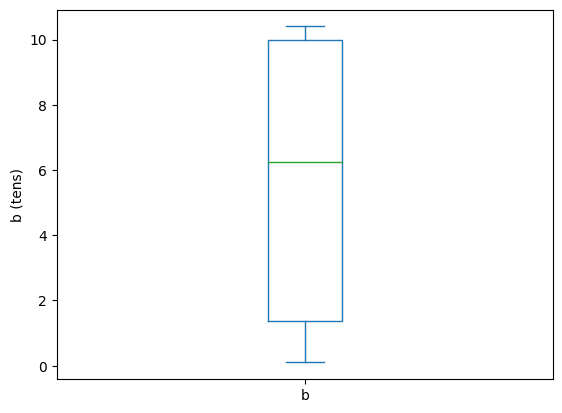

In [9]:
bp = (df.b/10).plot.box()
bp.set_ylabel("b (tens)")
print("The median is the middle line in the box, the top and bottom of the box are the 75th and 25th percentiles\n"
      "Horizontal lines from the top and bottom are the 95th and 5th percentiles.\n"
      "Outliers are sometimes plotted as individual dots that are in-line with whiskers (the vertical lines)")

### Frequency tables and histograms
A frequency table (or frequency distribution) lists a set of values and how often each one appears.
These tables help you understand which data values are common and which are rare.


In [10]:
df1 = pd.DataFrame(np.array([["Ana", "Cat"], ["María", "Dog"], ["Diana", "Cat"], ["Martha", "Hamster"], ["Lucía", "Bunny"], ["Liam", "Cat"],["Noah", "Cat"],["Oliver", "Fish"],["Olivia", "Snake"]]),
                  columns=['Owner', 'Pet'])
df1


,Owner,Pet
0,Ana,Cat
1,María,Dog
2,Diana,Cat
3,Martha,Hamster
4,Lucía,Bunny
5,Liam,Cat
6,Noah,Cat
7,Oliver,Fish
8,Olivia,Snake


In [11]:
df1.Pet.value_counts()


Cat        4
Dog        1
Hamster    1
Bunny      1
Fish       1
Snake      1
Name: Pet, dtype: int64

Values can be mapped into segments using the pandas .cut function.


In [12]:
import re
# Make a table from Gross domestic product by state in Mexico.
# I chose to use the "aggregate gross value from 2020"
pibe = pd.read_csv("datasets/PIBE_2.csv")
pibe = pibe[6:38]
pibe.rename(columns={"Concepto": "State", "2020 R": "Aggregate gross value 2020"}, inplace=True)
pibe = pibe[["State", "Aggregate gross value 2020"]]
pibe

,State,Aggregate gross value 2020
6,Aguascalientes,204726.037
7,Baja California,553650.356
8,Baja California Sur,121985.608
9,Campeche,481994.490
10,Coahuila de Zaragoza,535558.427
11,Colima,101247.641
12,Chiapas,254356.257
13,Chihuahua,538030.466
14,Ciudad de México,2856750.909
15,Durango,189703.349


In [13]:
binnedVAB = pd.cut(pibe["Aggregate gross value 2020"], 10)
print("A Frequency table from the aggregate gross value in 2020")
binnedVAB.value_counts()

A Frequency table from the aggregate gross value in 2020


(88174.9, 367521.73]          16
(367521.73, 644102.75]        10
(644102.75, 920683.77]         2
(920683.77, 1197264.79]        1
(1197264.79, 1473845.809]      1
(1473845.809, 1750426.829]     1
(2580169.889, 2856750.909]     1
(1750426.829, 2027007.849]     0
(2027007.849, 2303588.869]     0
(2303588.869, 2580169.889]     0
Name: Aggregate gross value 2020, dtype: int64

### Histogram
a graph that shows the frequency of numerical data using rectangles


Text(0.5, 0, 'Aggregate gross value (Millions)')

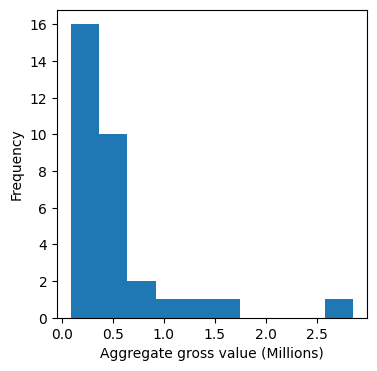

In [14]:
ax = (pibe['Aggregate gross value 2020'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Aggregate gross value (Millions)')


### Density Plot
visualises the distribution of data over a continuous interval or time period. This chart is a variation of a Histogram that uses kernel smoothing to plot values, allowing for smoother distributions by smoothing out the noise


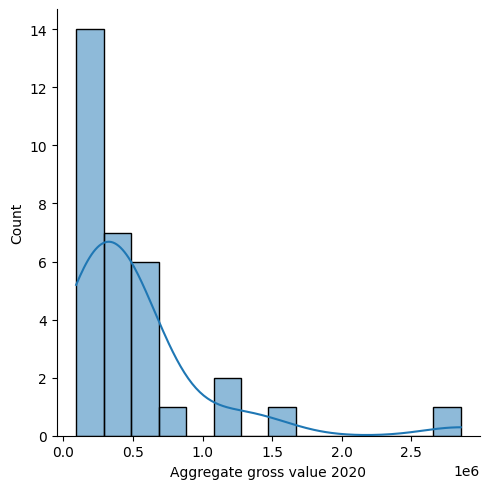

In [15]:
sns.displot(data=pibe, x="Aggregate gross value 2020", kde=True)


## Binary and categorical data

- **Mode**
- **Expected value**
- **Bar charts**
- **Pie charts**

### Bar charts
A bar chart is a graph with rectangular bars. The graph usually compares different categories. Although the graphs can be plotted vertically (bars standing up) or horizontally (bars laying flat from left to right), the most usual type of bar graph is vertical. 
Categories are listed on the x-axis and frequencies or proportions on the y-axis.

In [16]:
land_use = pd.read_excel("datasets/Land-use-per-gram-of-protein.xlsx")
land_use.sort_values(by="Land Use (in sqm)", ascending=False, inplace=True)
land_use.head()



,Food Type,Year,Land Use (in sqm)
0,Beef/Mutton,2017,1.024301
5,Pork,2017,0.129945
3,Fresh Produce,2017,0.098235
6,Poultry,2017,0.075102
2,Eggs,2017,0.051358


Land use per gram of protein


<AxesSubplot:xlabel='Land Use (in sqm)', ylabel='Food Type'>

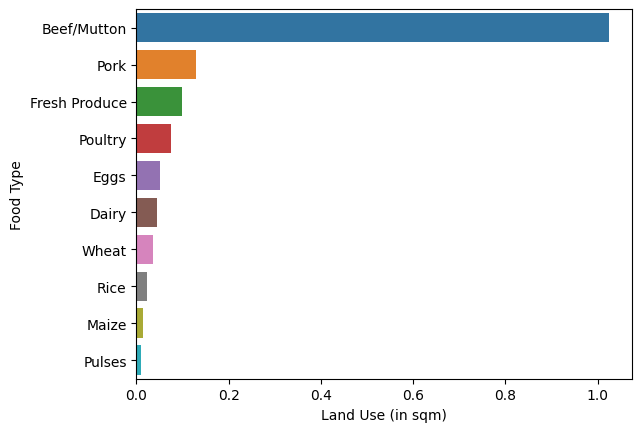

In [17]:
print("Land use per gram of protein")
sns.barplot(data=land_use, x="Land Use (in sqm)", y="Food Type")


### Mode
Is the value or values in case of a tie that appears most often in the data.

### Expected value
It's a generalization of the weighted average.
It's the arithmetic mean of a large number of independently selected outcomes of a random variable

Multiply each outcome by its probability of occurrence: E.g. in a multiple choice with "a", "b", "c" and "d" as possible answers and 20 questions. guessing all "a", then you can expect to get 25% right (5 out of 20).
The probability (P) of getting a question right if you guess: .25
The number of questions on the test (n)*: 20
P x n = .25 x 20 = 5


### Probability

For simple means, the probability that an event will happen is the proportion of times it will occur if the situation could be repeated over and over, countless times.


## Correlation
Any statistical relationship, whether causal or not, between two random variables or bi-variate data.

- **Correlation coefficient**
- **Correlation matrix**
- **Scatterplot**


### Correlation coefficient
gives an estimate of the correlation between two variables that always lies on the same scale.

To compute Pearson's Correlation Coefficient, multiply deviations from the mean for variable 1 times those for variable 2 and divide by the product of the standard deviations.

$$r = \sum_{i=1}^{n}\frac{\left (x_{i}-\bar{x} \right )\left(y_{i}-\bar{y} \right )}{(n-1)s_{x}s_{y}}$$


<AxesSubplot:>

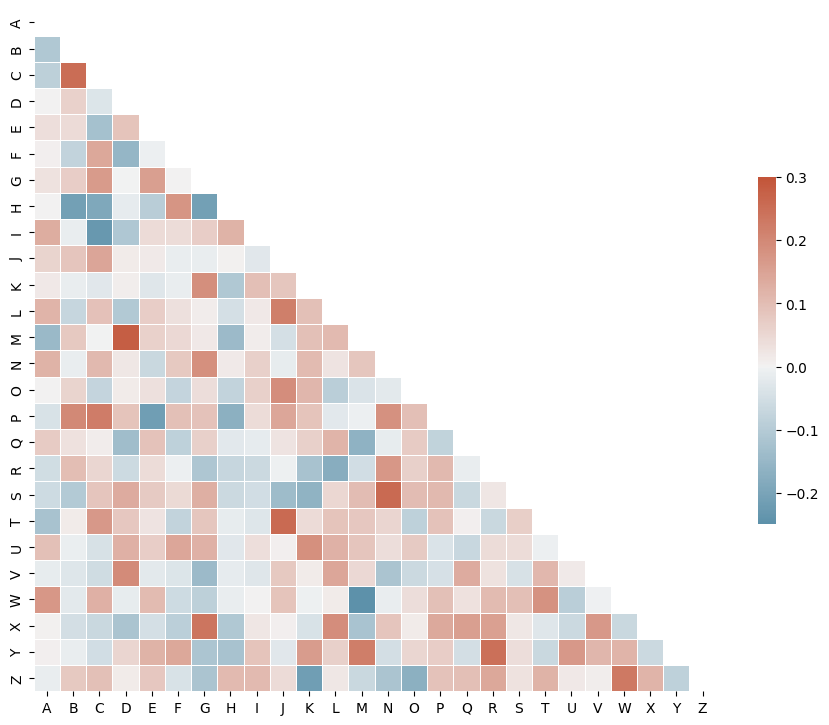

In [18]:
from string import ascii_letters
import matplotlib.pyplot as plt
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))
corr = d.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [19]:
# A similar result can be achieved with pandas .corr()
d.corr().head(5)


,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
A,1.000000,-0.107401,-0.086468,0.000131,0.035047,0.004749,0.028226,0.000422,0.132100,0.057720,...,0.073645,-0.055396,-0.058241,-0.123823,0.096451,-0.015178,0.172725,0.003791,0.005531,-0.011534
B,-0.107401,1.000000,0.254632,0.061506,0.043581,-0.078019,0.069133,-0.211278,-0.011796,0.085277,...,0.031315,0.100451,-0.103068,0.011187,-0.008536,-0.030730,-0.022978,-0.050483,-0.014468,0.078737
C,-0.086468,0.254632,1.000000,-0.033682,-0.127464,0.141223,0.164793,-0.188574,-0.230059,0.145777,...,0.010497,0.051872,0.084793,0.167976,-0.043806,-0.057125,0.125580,-0.068426,-0.052764,0.094661
D,0.000131,0.061506,-0.033682,1.000000,0.086054,-0.153212,-0.000963,-0.017282,-0.109283,0.011056,...,-0.136959,-0.061816,0.134112,0.081143,0.124706,0.194911,-0.016944,-0.116963,0.054315,0.014383
E,0.035047,0.043581,-0.127464,0.086054,1.000000,-0.007159,0.157224,-0.096254,0.043785,0.015117,...,0.090499,0.041276,0.076138,0.027021,0.069976,-0.021745,0.104822,-0.047913,0.120465,0.080980


There are other types of correlation coefficients such as Spearman's rho or Kendall's tau. They are based on the rank of the data, so they are robust to outliers and can handle certain types of nonlinearities.
However, data scientist can generally stick to Pearson's correlation coefficient and its robust alternatives for exploratory analysis. The appeal of rank based estimates is mostly for smaller data sets and specific hypothesis tests.


### Scatterplots
is a type of data display that shows the relationship between two numerical variables.

for the next example I selected two columns with strong correlation based on the previous heatmap


<AxesSubplot:xlabel='N', ylabel='S'>

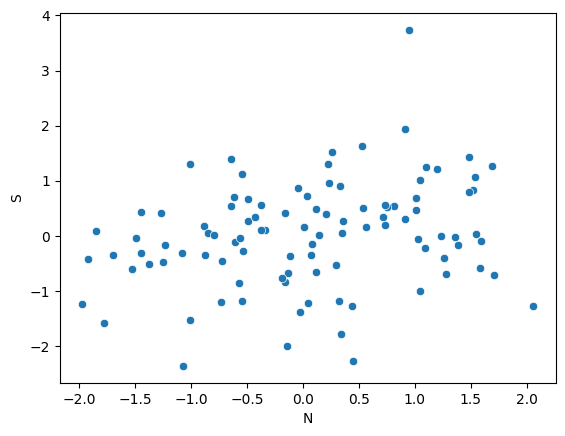

In [20]:
sns.scatterplot(data=d, x="N", y="S")
